In [1]:
setwd("..")

In [35]:
require(sp)
require(magrittr)
library(tidyr)
library(dplyr)
require(RColorBrewer)

load("scripts/worldmap.Rdata", verbose = T)
load("data/ba_mon_clim_masked_df.Rdata", verbose = T)
load("data/biome_dataframe_masked.Rdata", verbose = T)
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("fireSeason_def_2.Rdata", verbose = T)

load('corrDfAnnualClusV2.Rdata', verbose = T)
load('corrDfAnnualClusLag1V2.Rdata', verbose = T)
load('corrDfAnnualClusLag2V2.Rdata', verbose = T)
load('corrDfAnnualClusLag3V2.Rdata', verbose = T)

load('corrDfDeltaAnnualClusV2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag1V2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag2V2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag3V2.Rdata', verbose = T)

df.log = log1p(df_masked)

Loading objects:
  coast.lines
Loading objects:
  df_masked
  masked_coords
Loading objects:
  legend.biomes
  biomes
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeason_def_2
Loading objects:
  corr.df
Loading objects:
  corr.df.lag.1
Loading objects:
  corr.df.lag.2
Loading objects:
  corr.df.lag.3
Loading objects:
  corr.df.delta
Loading objects:
  corr.df.delta.1
Loading objects:
  corr.df.delta.2
Loading objects:
  corr.df.delta.3


In [25]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

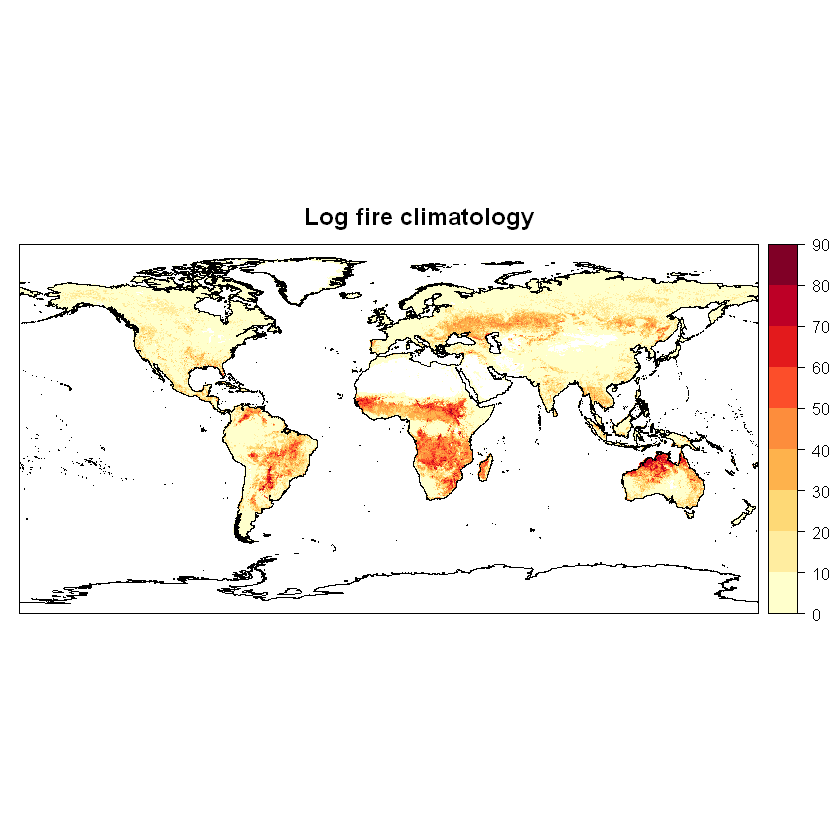

In [7]:
# Plot of the fire climatology

#jpeg(file="Figures/Figure1a.jpeg")

arg.list <- list(col.regions = brewer.pal(9, 'YlOrRd'), at = seq(0, 90, 10),
                 main = paste("Log fire climatology"))

df1 <- cbind.data.frame(masked_coords, apply(df.log, 1, sum))
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

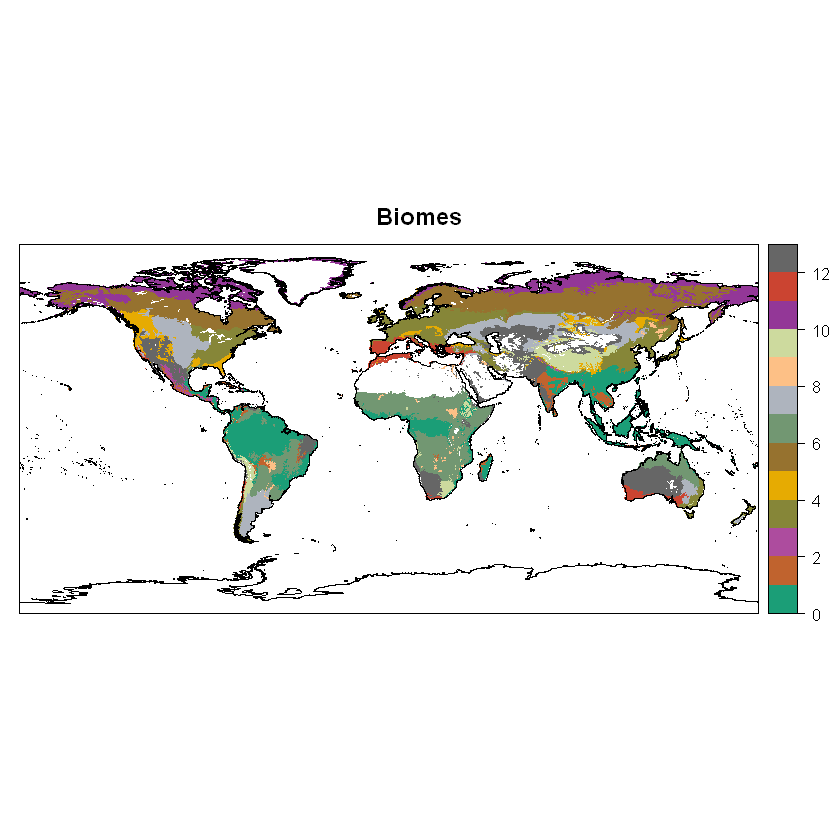

In [11]:
# Plot of the biomes

#jpeg(file="Figures/Figure1b.jpeg")

arg.list <- list(col.regions = colorRampPalette(c(brewer.pal(8, "Dark2"), brewer.pal(8, "Accent"))),
                  at = seq(0, 13, 1), main = paste("Biomes"))
v <- as.numeric(fireSeason_def_2$BIOME)
v[which(v %in% c(14,98,99))] = NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

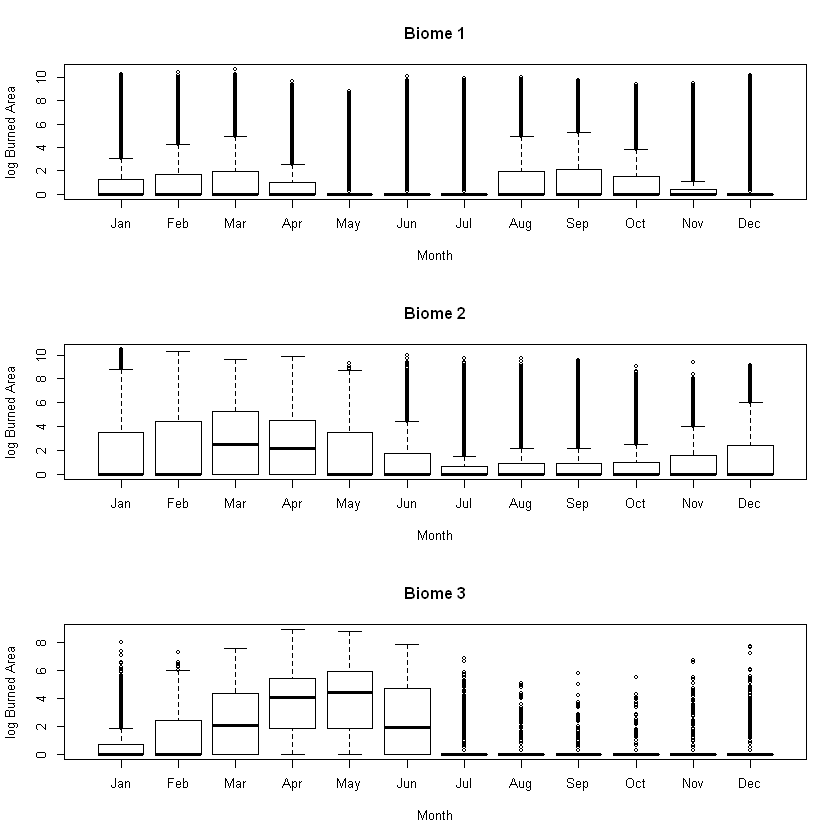

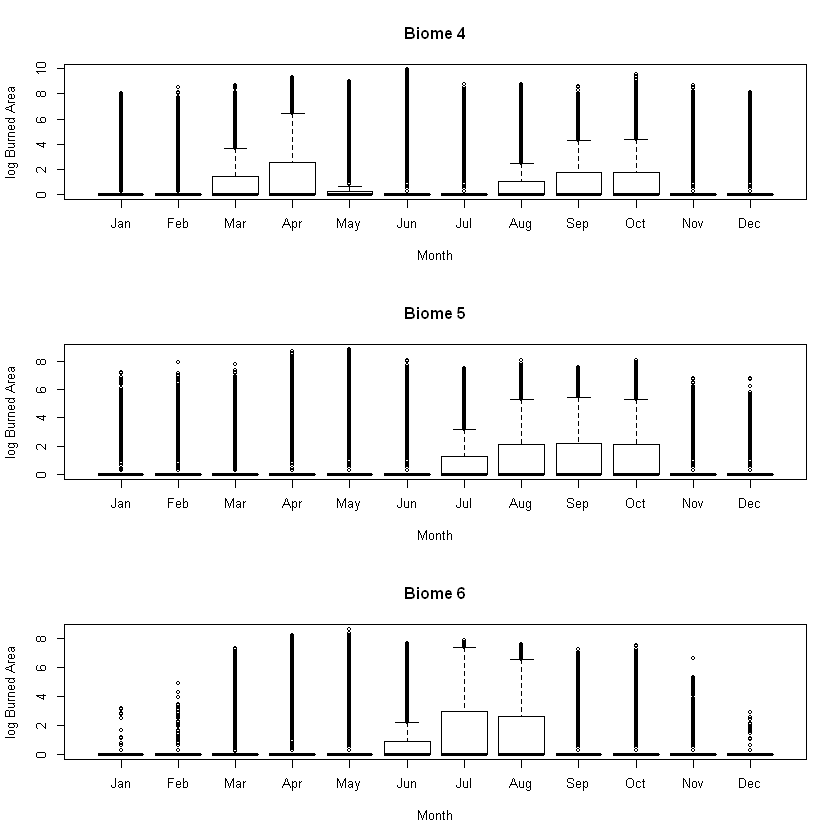

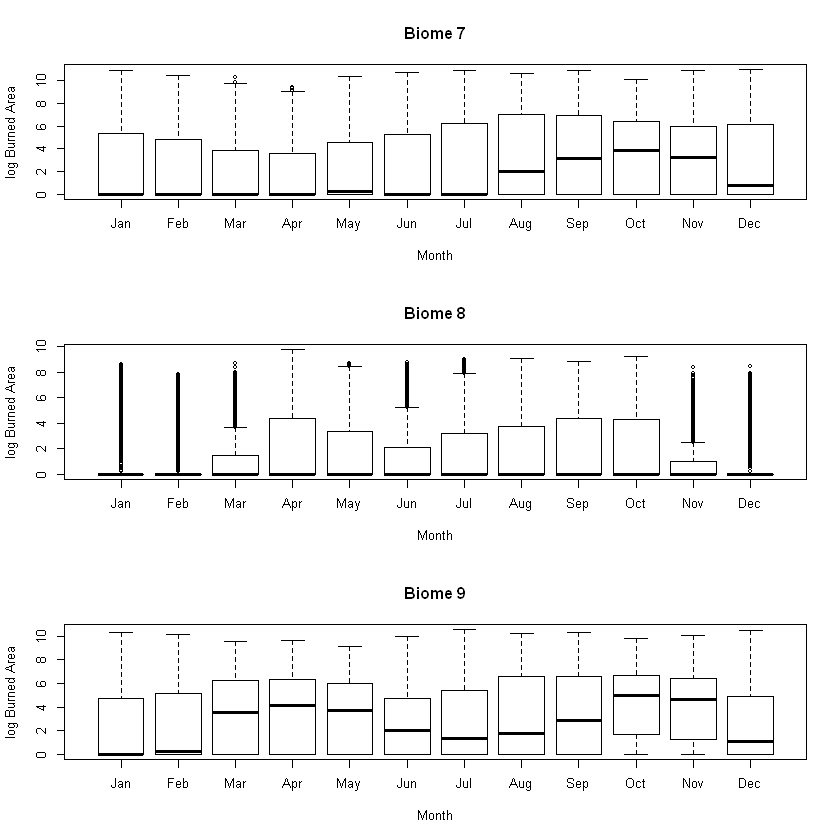

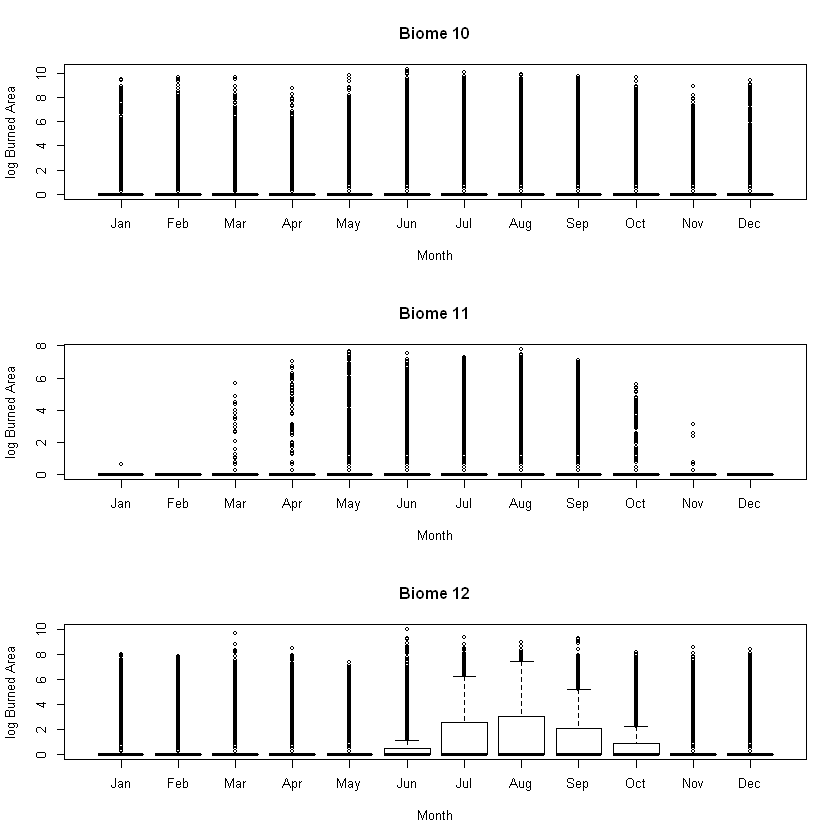

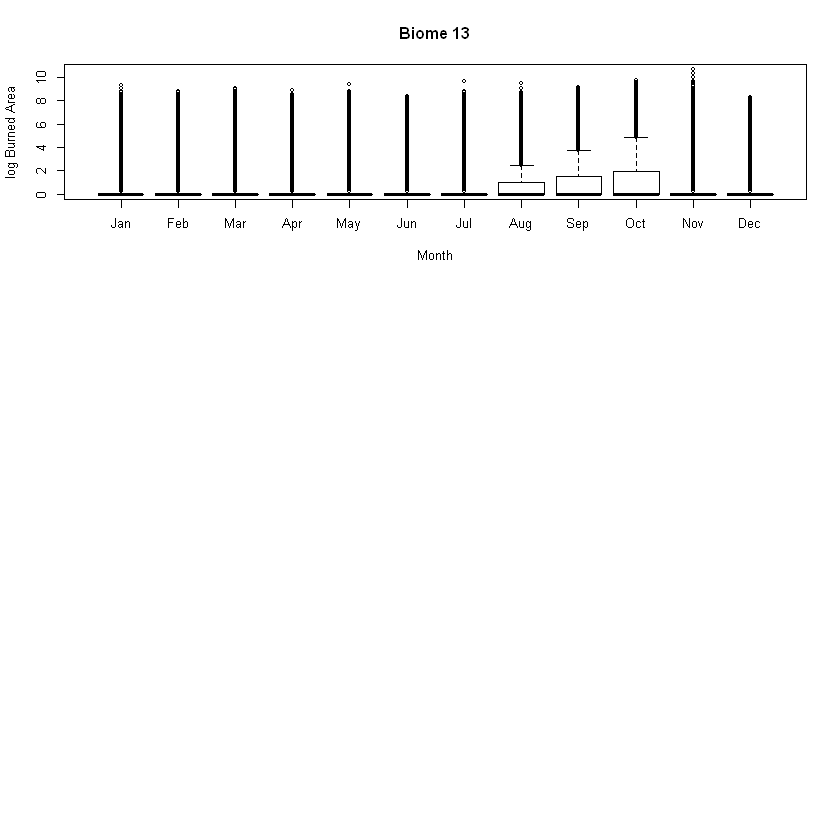

In [13]:
# Boxplots of the burned area distribution per month and biome

names(df.log) = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
#jpeg(file="Figures/Figure2_part1.jpeg")

par(mfrow = c(3,1))
for (i in 1:3){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log[ind.biome,], main = paste('Biome', toString(i)), xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part2.jpeg")

par(mfrow = c(3,1))
for (i in 4:6){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log[ind.biome,], main = paste('Biome', toString(i)), xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part3.jpeg")

par(mfrow = c(3,1))
for (i in 7:9){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log[ind.biome,], main = paste('Biome', toString(i)), xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part4.jpeg")

par(mfrow = c(3,1))
for (i in 10:12){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log[ind.biome,], main = paste('Biome', toString(i)), xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part5.jpeg")

par(mfrow = c(3,1))
for (i in 13){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log[ind.biome,], main = paste('Biome', toString(i)), xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

In [ ]:
# Spatial distribution of the clusters

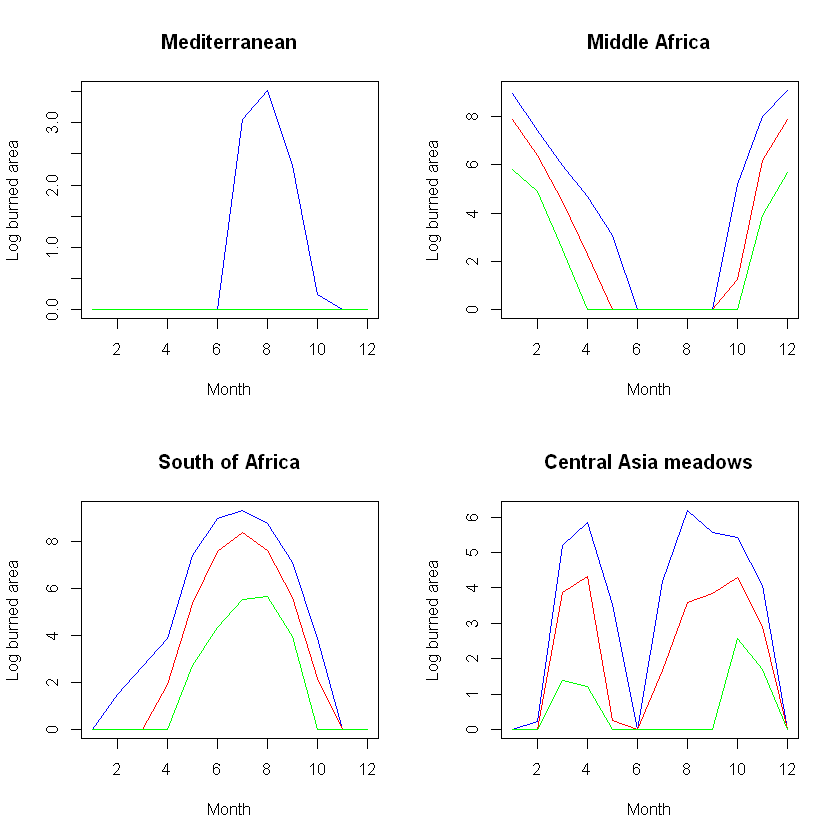

In [16]:
# Fire seasons

#jpeg(file="Figures/Figure4.jpeg")

plot.quantiles <- function(fireSeasons, df, biome, cluster, title = '') {
      
    ind.coords = which(fireSeasons$BIOME == biome & fireSeasons$cl == cluster)

    med = apply(df[ind.coords,], 2, median, na.rm = T)
    p25 = apply(df[ind.coords,], 2, quantile, prob = 0.25, na.rm = T)
    p75 = apply(df[ind.coords,], 2, quantile, prob = 0.75, na.rm = T)
    
    if (title == ''){
        tile = paste('Biome', toString(biome), ', Cluster', toString(cluster))
    }
    
    plot(p75, col = 'blue', type = 'l', xlab = "Month", ylab = "Log burned area", main = title)
    lines(1:12, med, col = "red")
    lines(1:12, p25, col = "green") 
}


par(mfrow = c(2,2))

plot.quantiles(fireSeason_def_2, log1p(df_masked), 12, 3, title = 'Mediterranean')
plot.quantiles(fireSeason_def_2, log1p(df_masked), 7, 6, title = 'Middle Africa')
plot.quantiles(fireSeason_def_2, log1p(df_masked), 7, 1, title = 'South of Africa')
plot.quantiles(fireSeason_def_2, log1p(df_masked), 4, 3, title = 'Central Asia meadows')
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

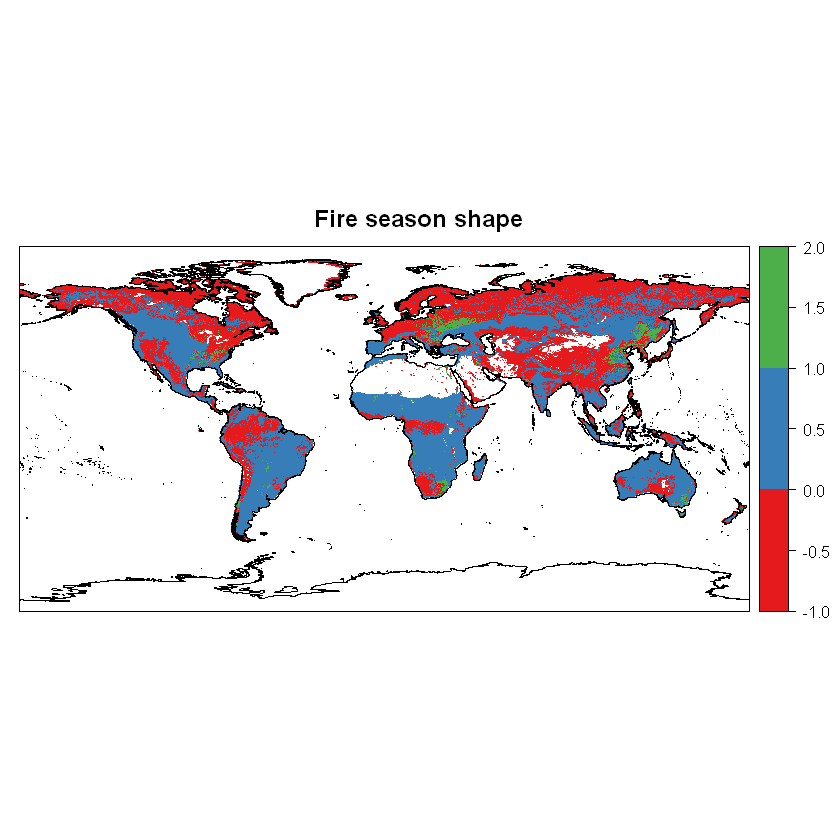

In [19]:
# Fire season shape

#jpeg(file="Figures/Figure5.jpeg")

arg.list <- list(col.regions = brewer.pal(3, 'Set1'),
                  at = seq(-1, 2, 1), main = paste("Fire season shape"))

v <- fireSeason_def_2$form
v[which(fireSeason_def_2$form == 3)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

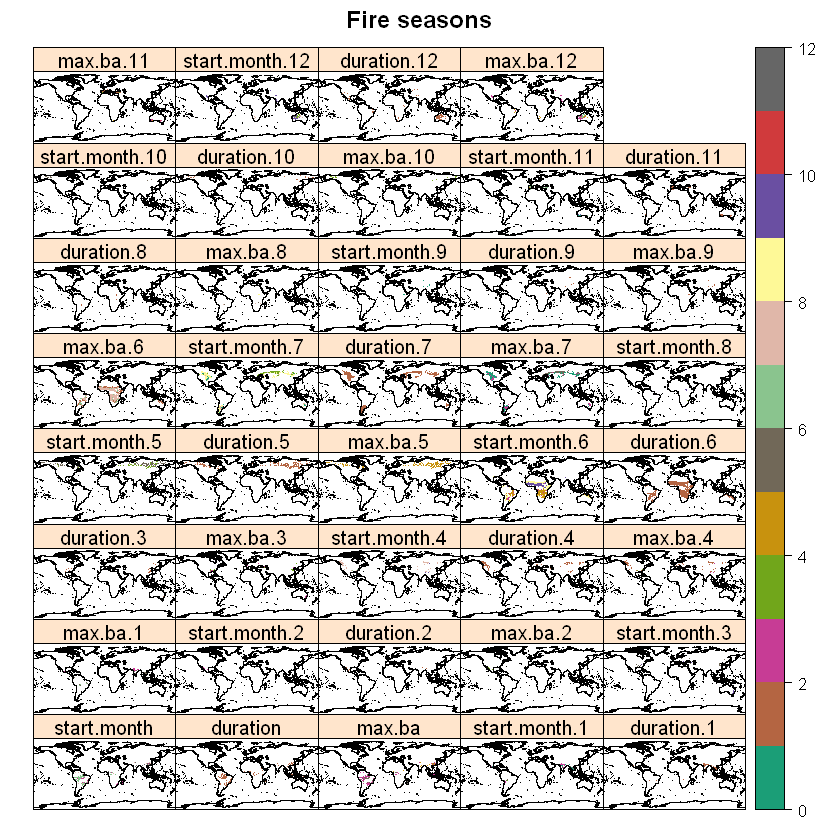

In [22]:
# Fire seasons (unimodal clusters)

plot.fire.seasons <- function (fireSeasons, df, form){
    df1 = masked_coords
    
    for (biome in 1:13){

        start.month <- numeric(nrow(df.log))

        start.month[-which(fireSeasons$form == form)] <- NA
        start.month[which(fireSeasons$form == form)] <- fireSeasons$start.1[which(fireSeasons$form == form)]
        start.month[-which(fireSeasons$BIOME == biome)] <- NA


        duration <- numeric(nrow(df.log))

        duration[-which(fireSeasons$form == form)] <- NA

        duration[which(fireSeasons$form == form)] <- fireSeasons$end.1[which(fireSeasons$form == form)] - fireSeasons$start.1[which(fireSeasons$form == form)]
        duration[which(fireSeasons$form == form)][which(v[which(fireSeasons$form == form)]<0)] = 12 - abs(v[which(fireSeasons$form == form)][which(v[which(fireSeasons$form == form)]<0)])
        duration[which(fireSeasons$form == form)] = v[which(fireSeasons$form == form)] + 1
        duration[-which(fireSeasons$BIOME == biome)] <- NA

        max.ba <- rep(NA, nrow(df.log))
        clusters = sort(unique(fireSeasons[which(fireSeasons$form == form
                                                 & fireSeasons$BIOME == biome),]$cl))
        n.clusters = length(clusters)

        for (cl in 1:n.clusters){
            clus = clusters[cl]  
            ind.coords = which(fireSeasons$form == form & fireSeasons$BIOME == biome & fireSeasons$cl == clus)

            p75 = apply(df[ind.coords,], 2, quantile, prob = 0.75, na.rm = T)
            month = which.max(p75)
            max.ba[ind.coords] = mean(df[ind.coords, month], na.rm = T)
        }

        df1 <- cbind.data.frame(df1, start.month, duration, max.ba)    
    }

    arg.list <- list(col.regions = colorRampPalette(c(brewer.pal(8, "Dark2"), brewer.pal(8, "Accent"))), at = seq(0, 12, 1),
                         main = 'Fire seasons')

    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[["obj"]] <- df1

    arg.list[["ylim"]] <- c(-90,90)
    arg.list[["xlim"]] <- c(-180,180)
    do.call("spplot", arg.list) %>% print()
}

#jpeg(file="Figures/Figure6.jpeg")
plot.fire.seasons(fireSeason_def_2, log1p(df_masked), 1)
#dev.off()

In [42]:
# Fire seasons (bimodal clusters, main fire seasons)

#jpeg(file="Figures/Figure7.jpeg")
#plot.fire.seasons(fireSeason_def_2, log1p(df_masked), 2)
#dev.off()

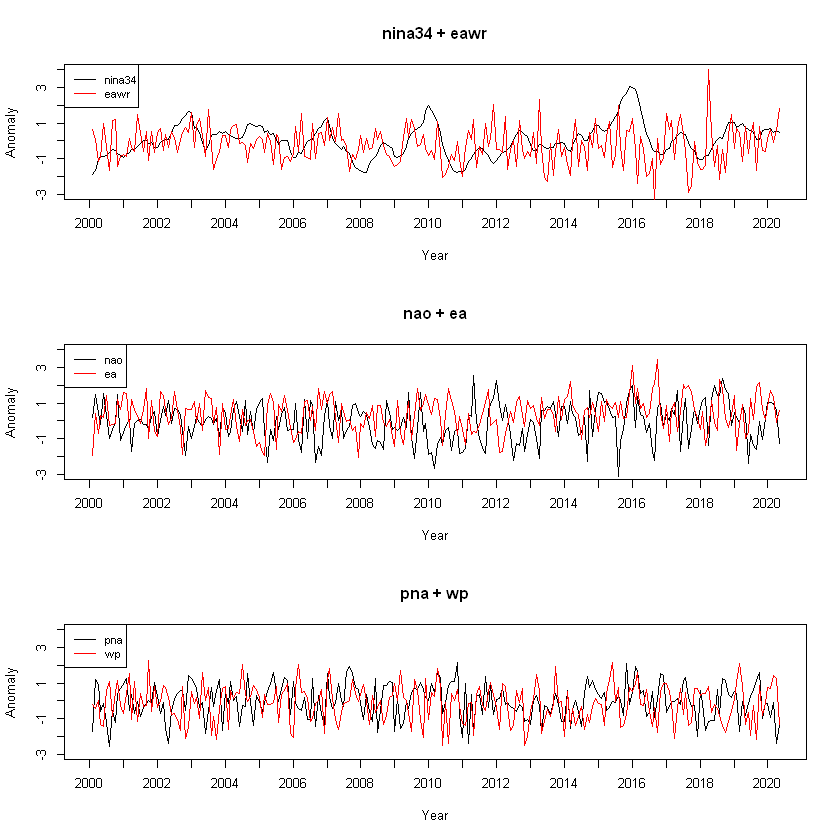

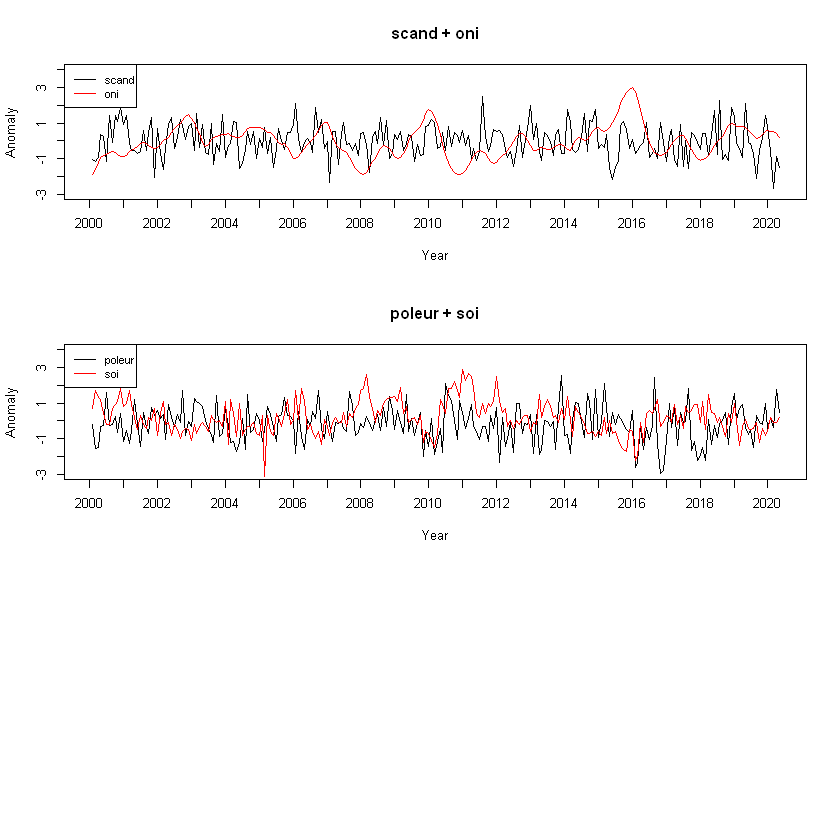

In [28]:
# Cpcs time series

list.cpcs = list(nina34, eawr, nao, ea, pna, wp, scand, oni, poleur, soi)
names = c('nina34', 'eawr', 'nao', 'ea', 'pna', 'wp', 'scand', 'oni', 'poleur', 'soi')

#jpeg(file="Figures/Figure9_part1.jpeg")
par(mfrow = c(3,1))
for (i in seq(1,5,2)){
    plot(c(rep(-3, 243), 4), type = 'n', xaxt = "n", 
         xlab = 'Year', ylab = 'Anomaly', main = paste(names[i], '+', names[i+1]))
    axis(1, at=seq(0,244,12), labels=2000:2020)
    lines(as.vector(t(as.matrix(list.cpcs[[i]][which(list.cpcs[[i]]$Year %in% 2000:2020),-1])))[1:244])
    lines(as.vector(t(as.matrix(list.cpcs[[i+1]][which(list.cpcs[[i+1]]$Year %in% 2000:2020),-1])))[1:244], col = 'red')
    legend("topleft", legend = c(names[i], names[i+1]), col = c('black', 'red'), lty = c(1,1), cex = .8)
}
#dev.off()

#jpeg(file="Figures/Figure9_part2.jpeg")
par(mfrow = c(3,1))
for (i in seq(7,9,2)){
    plot(c(rep(-3, 243), 4), type = 'n', xaxt = "n", 
         xlab = 'Year', ylab = 'Anomaly', main = paste(names[i], '+', names[i+1]))
    axis(1, at=seq(0,244,12), labels=2000:2020)
    lines(as.vector(t(as.matrix(list.cpcs[[i]][which(list.cpcs[[i]]$Year %in% 2000:2020),-1])))[1:244])
    lines(as.vector(t(as.matrix(list.cpcs[[i+1]][which(list.cpcs[[i+1]]$Year %in% 2000:2020),-1])))[1:244], col = 'red')
    legend("topleft", legend = c(names[i], names[i+1]), col = c('black', 'red'), lty = c(1,1), cex = .8)
}
#dev.off()

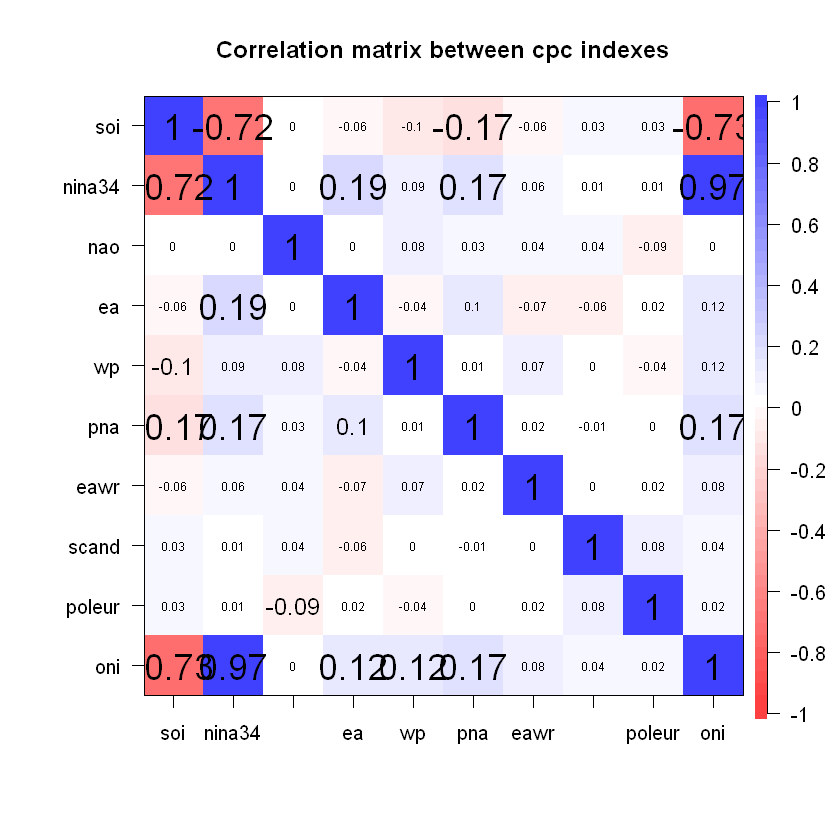

In [41]:
l = list(nina34, nao, ea, wp, pna, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

library(psych)
colnames(M) = c('soi', 'nina34', 'nao', 'ea', 'wp', 'pna', 'eawr', 'scand', 'poleur', 'oni')

#jpeg(file="Figures/Figure10.jpeg")
corPlot(M, cex = 1.2, main = "Correlation matrix between cpc indexes")
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

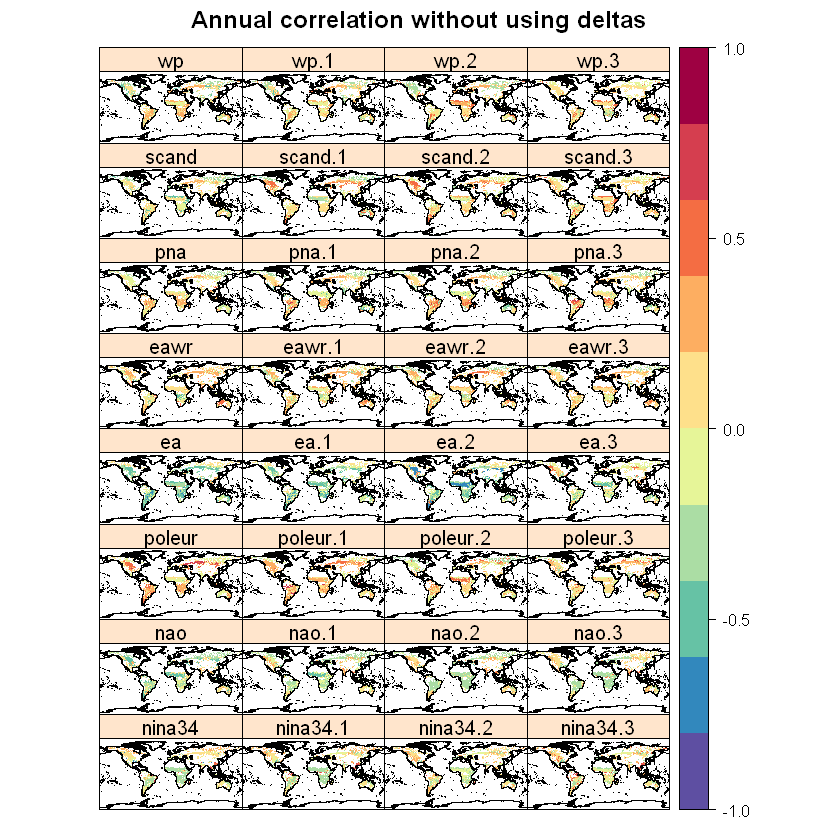

In [36]:
#jpeg('Figures/Figure11a.jpeg')
arg.list <- list(col.regions = brewer.pal(11, 'Spectral')[11:1][-6],
                      at = seq(-1, 1, 0.2))
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
arg.list[['main']] = 'Annual correlation without using deltas'
df1 = masked_coords
for (i in seq(3,17,2)){ 
    df1 <- cbind.data.frame(df1, corr.df[i], corr.df.lag.1[i], corr.df.lag.2[i], corr.df.lag.3[i])    
}
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
do.call("spplot", arg.list) %>% print()
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

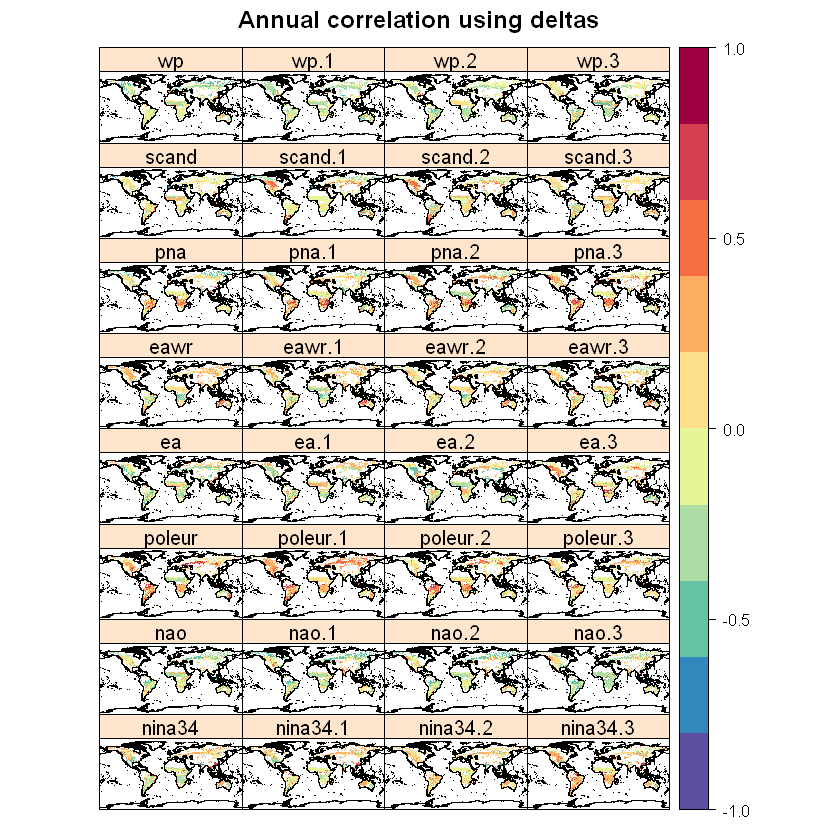

In [37]:
#jpeg('Figures/Figure11b.jpeg')
arg.list <- list(col.regions = brewer.pal(11, 'Spectral')[11:1][-6],
                      at = seq(-1, 1, 0.2))
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
arg.list[['main']] = 'Annual correlation using deltas'
df1 = masked_coords
for (i in seq(3,17,2)){ 
    df1 <- cbind.data.frame(df1, corr.df.delta[i], corr.df.delta.1[i], corr.df.delta.2[i], corr.df.delta.3[i])    
}
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
do.call("spplot", arg.list) %>% print()
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

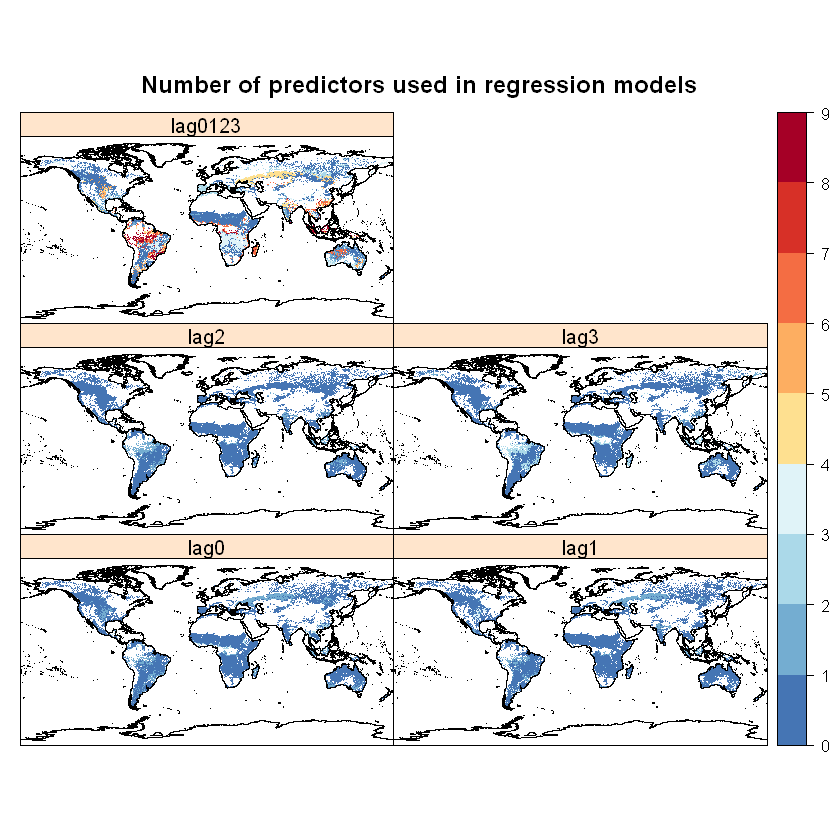

In [38]:
#jpeg('Figures/Figure12.jpeg')
arg.list <- list(col.regions = rev(brewer.pal(11, 'RdYlBu'))[2:11],
                          at = seq(0, 9, 1))
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)

v = cbind(as.numeric(corr.df.delta$nao.pvalue<0.05), as.numeric(corr.df.delta$poleur.pvalue<0.05),
          as.numeric(corr.df.delta$ea.pvalue<0.05), as.numeric(corr.df.delta$eawr.pvalue<0.05),
          as.numeric(corr.df.delta$pna.pvalue<0.05), as.numeric(corr.df.delta$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta$scand.pvalue<0.05), as.numeric(corr.df.delta$wp.pvalue<0.05))
lag0 = rowSums(v)
df1 <- cbind.data.frame(masked_coords, lag0)

v = cbind(as.numeric(corr.df.delta.1$nao.pvalue<0.05), as.numeric(corr.df.delta.1$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.1$ea.pvalue<0.05), as.numeric(corr.df.delta.1$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.1$pna.pvalue<0.05), as.numeric(corr.df.delta.1$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.1$scand.pvalue<0.05), as.numeric(corr.df.delta.1$wp.pvalue<0.05))
lag1 = rowSums(v)
df1 <- cbind.data.frame(df1, lag1)

v = cbind(as.numeric(corr.df.delta.2$nao.pvalue<0.05), as.numeric(corr.df.delta.2$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.2$ea.pvalue<0.05), as.numeric(corr.df.delta.2$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.2$pna.pvalue<0.05), as.numeric(corr.df.delta.2$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.2$scand.pvalue<0.05), as.numeric(corr.df.delta.2$wp.pvalue<0.05))
lag2 = rowSums(v)
df1 <- cbind.data.frame(df1, lag2)

v = cbind(as.numeric(corr.df.delta.3$nao.pvalue<0.05), as.numeric(corr.df.delta.3$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.3$ea.pvalue<0.05), as.numeric(corr.df.delta.3$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.3$pna.pvalue<0.05), as.numeric(corr.df.delta.3$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.3$scand.pvalue<0.05), as.numeric(corr.df.delta.3$wp.pvalue<0.05))
lag3 = rowSums(v)
df1 <- cbind.data.frame(df1, lag3)

lag0123 = lag0 + lag1 + lag2 + lag3
df1 <- cbind.data.frame(df1, lag0123)

coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
arg.list[['main']] <- 'Number of predictors used in regression models'
do.call("spplot", arg.list) %>% print()
#dev.off()